Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# For checking - Just printing the first 5 rows in the dataframe

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print the last 5 rows of the dataframe

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns

gold_data.shape

(2290, 6)

In [ ]:
# Getting some basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking the number of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting the statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between various columns in a dataset:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr()

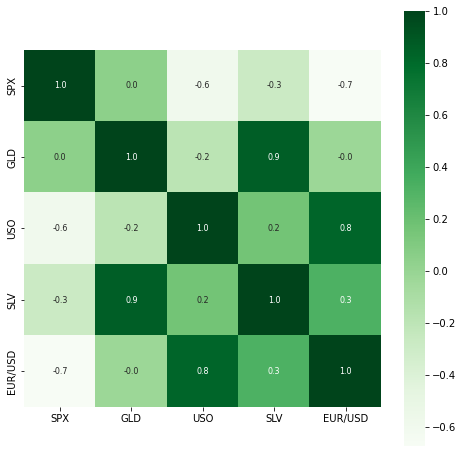

In [ ]:
# Constructing a heatmap to understand the correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Greens")

In [ ]:
# Correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


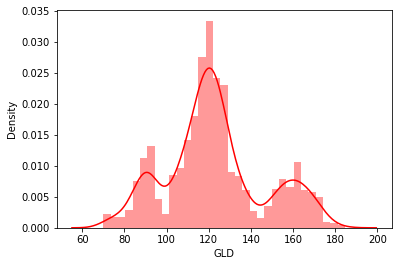

In [ ]:
# Checking the distribution of the GLD Price

sns.distplot(gold_data['GLD'], color='red')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# Prediction of Test Data

test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.43269914  81.7476     116.11559982 127.68760062 120.7456017
 154.83499769 150.2897978  126.1720001  117.66199878 125.97220067
 116.435401   172.34090085 141.39429832 167.8934982  115.17389996
 117.5820005  138.20680282 170.01360069 159.90720273 159.22169853
 155.08999961 125.17760019 176.72189951 156.74210285 125.24050061
  93.92030005  77.36420019 120.65879997 119.06169907 167.42319947
  88.35359998 125.5148004   91.08650055 117.60650005 121.180999
 137.39130138 115.59800158 115.3018003  149.20029985 107.30420126
 104.62530262  87.21519806 126.56250038 117.79099998 153.40419908
 119.64340005 108.29789997 108.01889808  93.26360045 127.06269796
  74.60350023 113.62419904 121.37160002 111.25329914 118.821099
 120.98689921 158.82840017 168.39570039 147.02059676  85.76159875
  94.36510034  86.89719892  90.59210026 118.88640084 126.38860075
 127.45559944 167.40040008 122.30789958 117.38379907  98.77340024
 168.37890213 142.98349829 132.17110295 121.28530229 121.4874993
 119.79050076 11

In [ ]:
# R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.9885840404213271


Compare the Actual Values and Predicted Values in a plot

In [43]:
Y_test = list(Y_test)

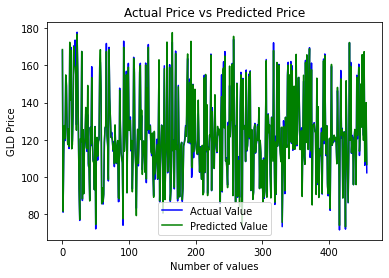

In [46]:
plt.plot(Y_test, color='Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()